In [10]:
import pandas as pd
import matplotlib.pyplot as plt

ind_point = 8
file_names_cv = [f"prediction_probabilities_cross_valid_fold_0_SetTransformer_indPoints_{ind_point}", f"prediction_probabilities_cross_valid_fold_1_SetTransformer_indPoints_{ind_point}", f"prediction_probabilities_cross_valid_fold_2_SetTransformer_indPoints_{ind_point}", f"prediction_probabilities_cross_valid_fold_3_SetTransformer_indPoints_{ind_point}", f"prediction_probabilities_cross_valid_fold_4_SetTransformer_indPoints_{ind_point}"]

# Read your dataframe (for example from a CSV file)
def read_and_plot(filename):
    df = pd.read_csv(f"set_transformer/resuls_SetTransformer/{filename}.csv",sep="\t")  # Replace with your file path
    plt.scatter(df['y_actual'], df['prediction'], marker='o', alpha = 0.3, c = "tab:blue", s=13)#, linestyle='-', color='b')
    return max(df['y_actual']), max(df['prediction'])


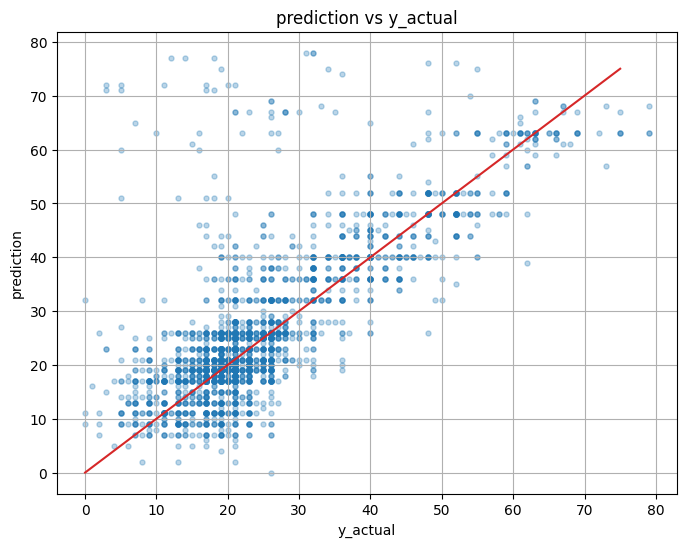

In [11]:
plt.figure(figsize=(8, 6))
plt.grid(True)
for file in file_names_cv:
    x_max, y_max = read_and_plot(file)
plt.plot([0,x_max],[0,x_max], c = "tab:red")
plt.title('prediction vs y_actual')
plt.xlabel('y_actual')
plt.ylabel('prediction')


plt.show()

In [3]:
# filename = "data_ogt/kegg.csv"
# df_keggs = pd.read_csv(filename,sep=",")
# # Replace empty or NaN cells with 0
# df_keggs.fillna(0, inplace=True)
# df_keggs = df_keggs.drop(columns=["acc"])
# print(df_keggs)

df_merged =                      acc  K07461  K00243  K00185  K01890  K00406  K03088  \
0     RS_GCF_003367245.1     3.0     1.0     1.0     1.0     3.0    16.0   
1     RS_GCF_019295435.1     6.0     1.0     2.0     1.0     2.0    36.0   
2     RS_GCF_004799685.1     1.0     0.0     1.0     1.0     1.0     0.0   
3     RS_GCF_003605635.1     1.0     0.0     0.0     1.0     0.0     1.0   
4     RS_GCF_014647115.1     1.0     0.0     0.0     1.0     0.0     0.0   
...                  ...     ...     ...     ...     ...     ...     ...   
3747  RS_GCF_001010355.1     1.0     0.0     0.0     1.0     3.0    11.0   
3748  RS_GCF_000429465.1     1.0     1.0     1.0     1.0     2.0    20.0   
3749  RS_GCF_002993285.1     3.0     0.0     0.0     1.0     0.0    11.0   
3750  RS_GCF_000189755.2     1.0     0.0     0.0     1.0     0.0     5.0   
3751  RS_GCF_020783335.1     4.0     0.0     2.0     1.0     1.0    27.0   

      K07240  K22391  K03657  ...  K12260  K19949  K18134  K14326   ogt   m

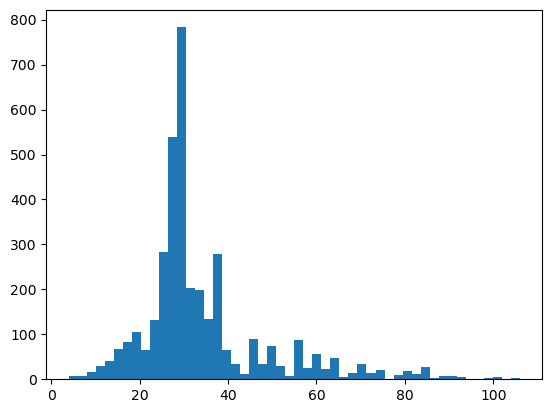

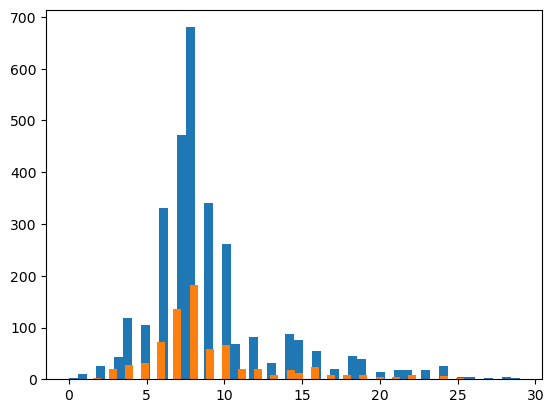

y_test new = tensor([11., 11.,  8.,  6.,  7., 12.,  6., 10.,  7.,  7., 13.,  6.,  8.,  7.,
         7., 20., 15.,  6.,  7.,  8.,  6.,  7., 13.,  8.,  8.,  8.,  3.,  7.,
        10., 11.,  7.,  8.,  9.,  5., 16.,  6.,  7., 12.,  7.,  7.,  9., 13.,
        20., 10.,  7.,  6.,  8.,  8.,  7.,  8.,  8., 17., 10.,  8.,  3.,  7.,
         6.,  6., 10.,  7.,  7.,  8.,  9.,  8., 15.,  3., 10., 16.,  9.,  8.,
         6.,  8.,  9.,  7.,  8.,  5.,  8., 16.,  8.,  7., 17.,  8.,  7.,  7.,
        22.,  9.,  9.,  7.,  6., 11.,  7., 10.,  7.,  8.,  9.,  7.,  8.,  8.,
         7.,  7.,  9.,  3.,  6.,  8.,  6.,  5., 16.,  9.,  5.,  4.,  9., 14.,
         8.,  9.,  8.,  4.,  7., 14., 14.,  8.,  8., 16.,  8., 10.,  4.,  9.,
         6.,  5., 17., 11.,  8., 17.,  8.,  8., 15.,  8., 19., 27.,  6.,  9.,
        16.,  9.,  5.,  7.,  8.,  5.,  7.,  8.,  8.,  8.,  8., 14.,  7., 16.,
         8.,  7.,  8., 11., 16.,  9.,  9.,  3., 14., 14.,  7.,  7.,  6., 10.,
         8.,  6., 24.,  1., 10., 10.,  8.,  6.,  7.

In [4]:
from set_transformer.main import read_ogt_data
X_train, y_train, X_test, y_test, num_classes = read_ogt_data()

print(y_train)

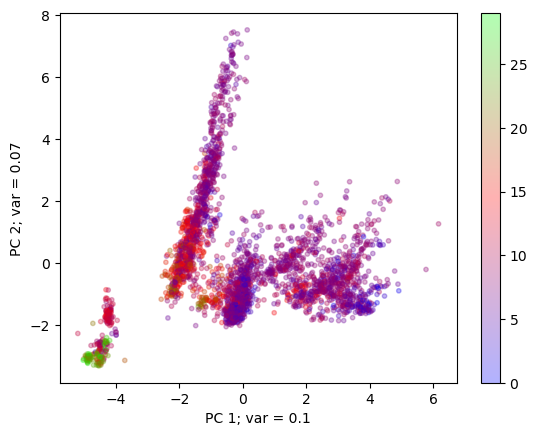

In [23]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA

#X_val = df_keggs.values

scaler = MaxAbsScaler()
# Fit and transform the data
X_val = scaler.fit_transform(X_train)

n_compon=2
# Run PCA on the X-data
pca = PCA(n_components=n_compon)
X_train_pca = pca.fit_transform(X_val)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure()
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.3, s = 10, c=y_train, cmap='brg')#, cmap=listed_cmap)
plt.xlabel(f"PC 1; var = {round(explained_variance_ratio[0],2)}")
plt.ylabel(f"PC 2; var = {round(explained_variance_ratio[1],2)}")
plt.colorbar()

In [6]:
from sklearn.manifold import TSNE

# Initialize and apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, max_iter=3000, init='pca') 
X_tsne = tsne.fit_transform(X_train) 

print(X_tsne.shape)

(3001, 2)


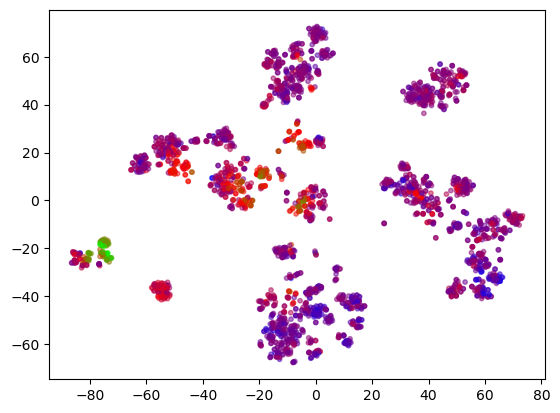

In [7]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, s = 10, c=y_train, cmap='brg')